<a href="https://colab.research.google.com/github/parwinderau/machinelearning/blob/main/Lecture_8_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# From the example seen in class (See examples Lecture 8)
# and using the make_moon classifier, try to create a Decision tree classifier and 
# compare it with a Decision tree classifier with no bagging.

# Take the dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.40, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)




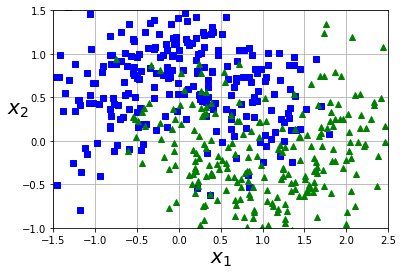

In [2]:
# plot the dataset

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# Prepare a functino to plot the Decision boundary when will be ready
import numpy as np
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

# Plot of the dataset
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Bagging classifier accuracy :  0.848


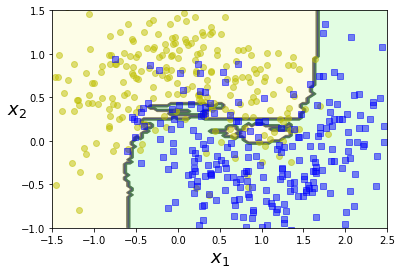

In [4]:
# import numpy as np

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)

# Make a prediction 
# .... Make your prediction here (see examples on Voting)
y_pred_bagging = bag_clf.predict(X_test)

# Accuracy Score for the Baggin Classifier



from sklearn.metrics import accuracy_score
# Accuracy Score
# Print the accuraxy score here .....
print("Bagging classifier accuracy : ",accuracy_score(y_test, y_pred_bagging))
plot_decision_boundary(bag_clf, X, y)

Tree classifier accuracy :  0.816


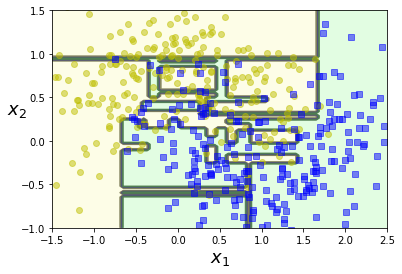

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
tree_clf = DecisionTreeClassifier(random_state=42)
# Fit the model and make a prediction
# Fit and predict the model here ...
# ...
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
# ...
# Accuracy Score
# print the accuracy score ....
print("Tree classifier accuracy : ",accuracy_score(y_test, y_pred_tree))
plot_decision_boundary(tree_clf, X, y)

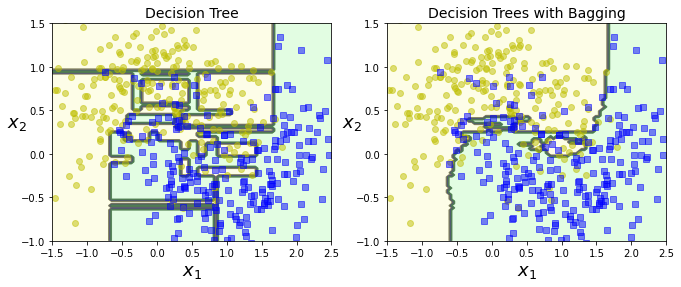

In [6]:
# Plot the two Classifiers (it works once your exercise is complete) 

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

**Out-of-Bag Evaluation**

In [ ]:
# Calculation of the Out of Bag Score (it works once your exercise is complete)
# This score is due by the "out of bag" data, when the valuation is obtained from
# models trained on completely different data from eachother.

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8346666666666667

In [ ]:

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.808